In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list
)

c:\Users\DELL\anaconda3\envs\data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

In [5]:
#Extracts the month (1–12) from the job_posted_date
df_DE['job_posted_month_no'] = df_DE['job_posted_date'].dt.month

#Expands rows so each skill is in its own row
df_DE_exploded = df_DE.explode('job_skills')

#Creates a pivot table showing how many times each skill appears in each month
df_DE_pivot = df_DE_exploded.pivot_table(
    index='job_posted_month_no',
    columns='job_skills', 
    aggfunc='size', 
    fill_value=0
    )

df_DE_pivot.loc['Total'] = df_DE_pivot.sum()

#Sorts the columns (skills) by total popularity (descending order).
df_DE_pivot = df_DE_pivot[df_DE_pivot.loc['Total'].sort_values(ascending=False).index]

df_DE_pivot = df_DE_pivot.drop('Total')

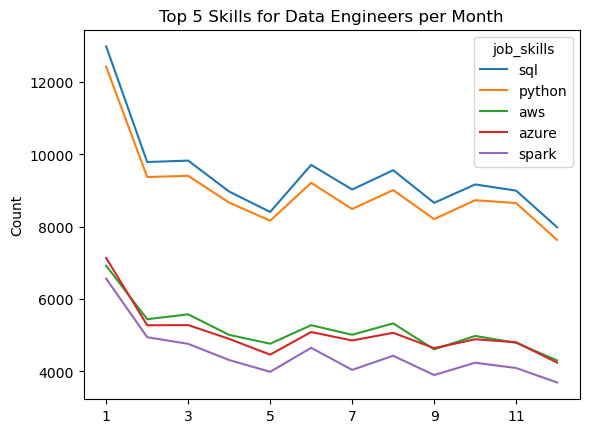

In [6]:
df_DE_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Engineers per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

<h2>Advanced Customization</h2>

<Axes: xlabel='job_posted_month_no'>

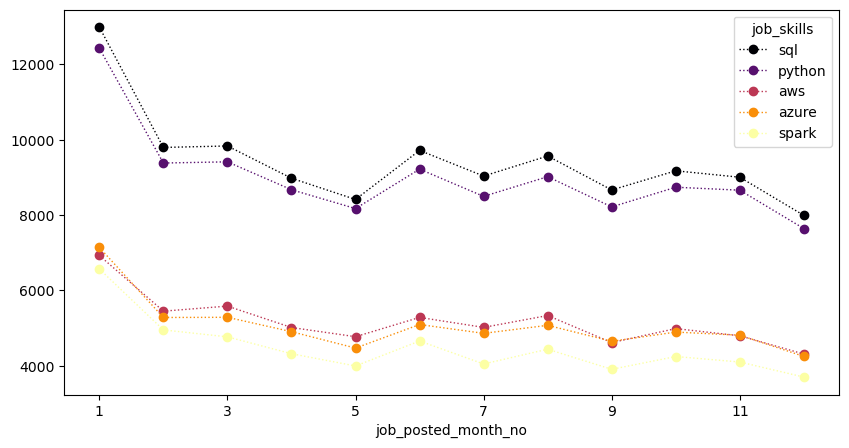

In [21]:
df_DE_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=1,
    linestyle=':',
    colormap='inferno',
    marker='o',
    figsize=(10,5)
)